In [5]:
#@title Import Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [2]:
#@title Load DataSet
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data"

columns = [
    'Class','Age','Sex','Steroid','Antivirals','Fatigue','Malaise','Anorexia',
    'LiverBig','LiverFirm','SpleenPalpable','Spiders','Ascites','Varices',
    'Bilirubin','AlkPhosphate','Sgot','Albumin','Protime','Histology'
]

df = pd.read_csv(url, header=None, names=columns)
df.replace('?', np.nan, inplace=True)
df = df.apply(pd.to_numeric)


In [3]:
#@title Data Preprocessing
df.fillna(df.mean(), inplace=True)

X = df.drop('Class', axis=1)
y = df['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


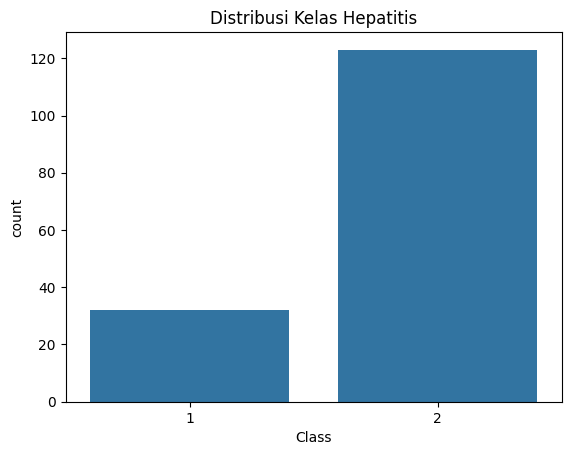

In [6]:
#@title Distribusi Target
sns.countplot(x=y)
plt.title("Distribusi Kelas Hepatitis")
plt.show()


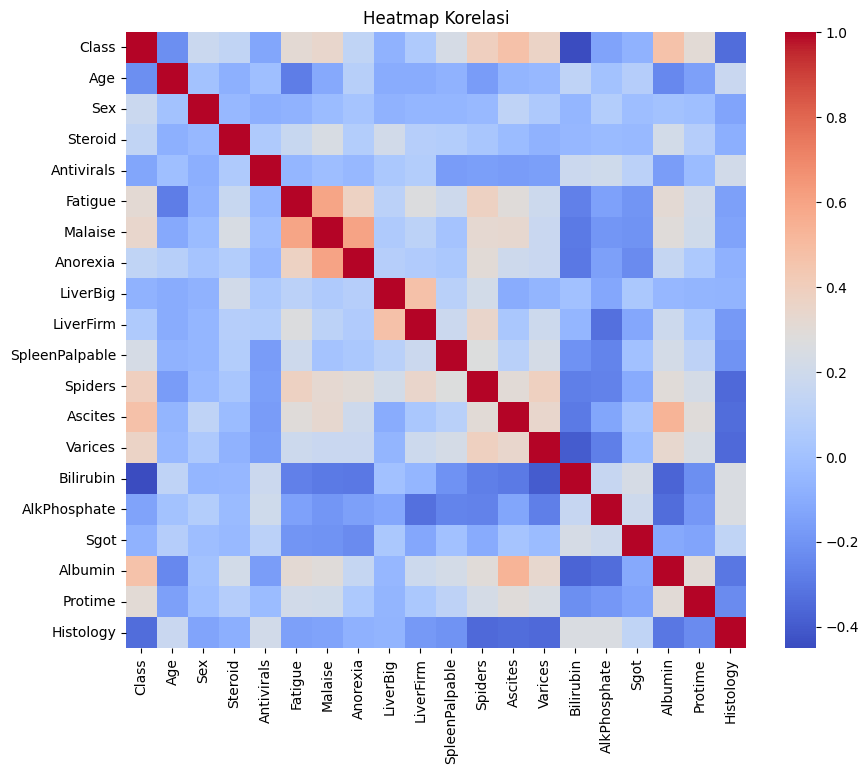

In [7]:
#@title Korelasi Fitur
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Heatmap Korelasi")
plt.show()


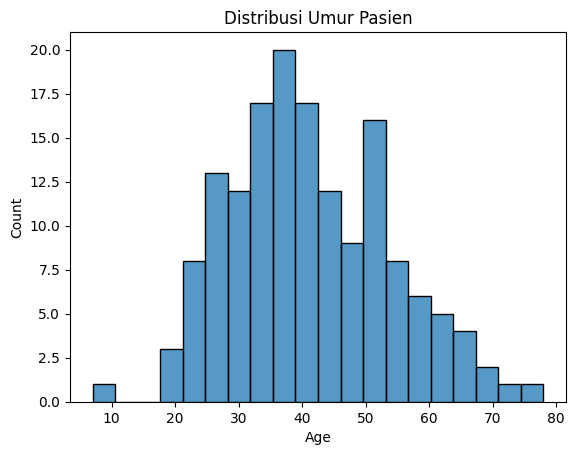

In [8]:
#@title Distribusi Umur
sns.histplot(df['Age'], bins=20)
plt.title("Distribusi Umur Pasien")
plt.show()


In [9]:
#@title Model 1 - Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.6774193548387096


In [10]:
#@title Model 2 - Support Vector Machine
svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))


SVM Accuracy: 0.7419354838709677


In [11]:
#@title Model 3 - Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.7419354838709677


In [12]:
#@title Model Deep Learning
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=1)

loss, acc = model.evaluate(X_test, y_test)
print("Deep Learning Accuracy:", acc)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0000e+00 - loss: 1.4838
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0177 - loss: 0.8183      
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2126 - loss: 0.2775 
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2289 - loss: -0.2658 
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1453 - loss: -0.9925     
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2456 - loss: -1.4331 
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1847 - loss: -2.4655 
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2074 - loss: -3.4811 
Epoch 9/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1492 - loss: -4.9181 
Epoch 10/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1976 - loss: -6.5841 
Epoch 11/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1685 - loss: -9.0618 
Epoch 12/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3

=== Random Forest Report ===
              precision    recall  f1-score   support

           1       0.33      0.14      0.20         7
           2       0.79      0.92      0.85        24

    accuracy                           0.74        31
   macro avg       0.56      0.53      0.52        31
weighted avg       0.68      0.74      0.70        31



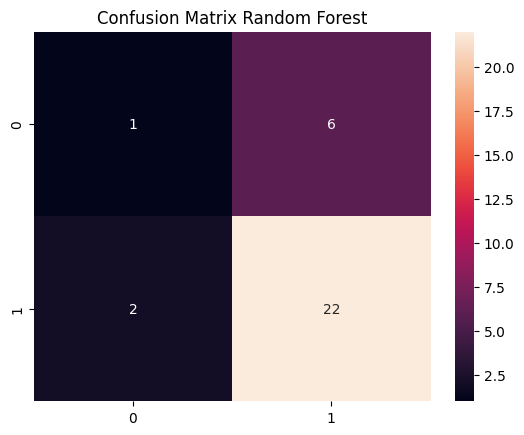

In [13]:
#@title Evaluasi Model
print("=== Random Forest Report ===")
print(classification_report(y_test, y_pred_rf))

cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion Matrix Random Forest")
plt.show()


In [15]:
#@title Requirement.txt
# pandas
# numpy
# matplotlib
# seaborn
# scikit-learn
# tensorflow
